# Economic Cycle

### Introduction

#### Import CSV file

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import FinanceDataReader as fdr

sns.set_style("whitegrid")

In [3]:
data = fdr.DataReader(['VIXCLS', 'BAMLH0A0HYM2', 'DGS10', 'DGS2', 'DGS3MO', 'T10Y2Y'], data_source='fred', start='1997')
data['10_2year_log'] = np.log(data['DGS10']/data['DGS2'])
data['10_3month_log'] = np.log(data['DGS10']/data['DGS3MO'])
data['high_yield_log'] = np.log(data['BAMLH0A0HYM2'])
data.reset_index(inplace=True)
data.head()

,DATE,DGS10,DGS2,DGS3MO,T10Y2Y,VIXCLS,BAMLH0A0HYM2,10_2year_log,10_3month_log,high_yield_log
0,1997-01-02,6.54,5.97,5.19,0.57,21.14,3.06,0.091190,0.231203,1.118415
1,1997-01-03,6.52,5.95,5.17,0.57,19.13,3.09,0.091483,0.232002,1.128171
2,1997-01-06,6.54,5.97,5.17,0.57,19.89,3.10,0.091190,0.235064,1.131402
3,1997-01-07,6.57,5.98,5.16,0.59,19.35,3.10,0.094093,0.241577,1.131402
4,1997-01-08,6.60,6.01,5.16,0.59,20.24,3.07,0.093645,0.246133,1.121678


In [4]:
data["year"] = data["DATE"].dt.year
data["month"] = data["DATE"].dt.month
data["day"] = data["DATE"].dt.day

### 20s Economic Cycle - COVID19

In [5]:
covid = data[data['year'] >= 2017]
covid.head()

,DATE,DGS10,DGS2,DGS3MO,T10Y2Y,VIXCLS,BAMLH0A0HYM2,10_2year_log,10_3month_log,high_yield_log,year,month,day
5285,2017-01-02,2.45,1.20,0.51,1.25,14.04,4.22,0.713766,1.569433,1.439835,2017,1,2
5286,2017-01-03,2.45,1.22,0.53,1.23,12.85,4.13,0.697237,1.530966,1.418277,2017,1,3
5287,2017-01-04,2.46,1.24,0.53,1.22,11.85,4.02,0.685050,1.535040,1.391282,2017,1,4
5288,2017-01-05,2.37,1.17,0.52,1.20,11.67,4.04,0.705886,1.516816,1.396245,2017,1,5
5289,2017-01-06,2.42,1.22,0.53,1.20,11.32,3.98,0.684917,1.518646,1.381282,2017,1,6


#### Visualization

In [51]:
covid_start = int(covid[covid['DATE'] == '2020-02-03 00:00:00'].index.values)
covid_end = int(covid[covid['DATE'] == '2020-03-23 00:00:00'].index.values)

Text(0, 0.5, '10_2year_log')

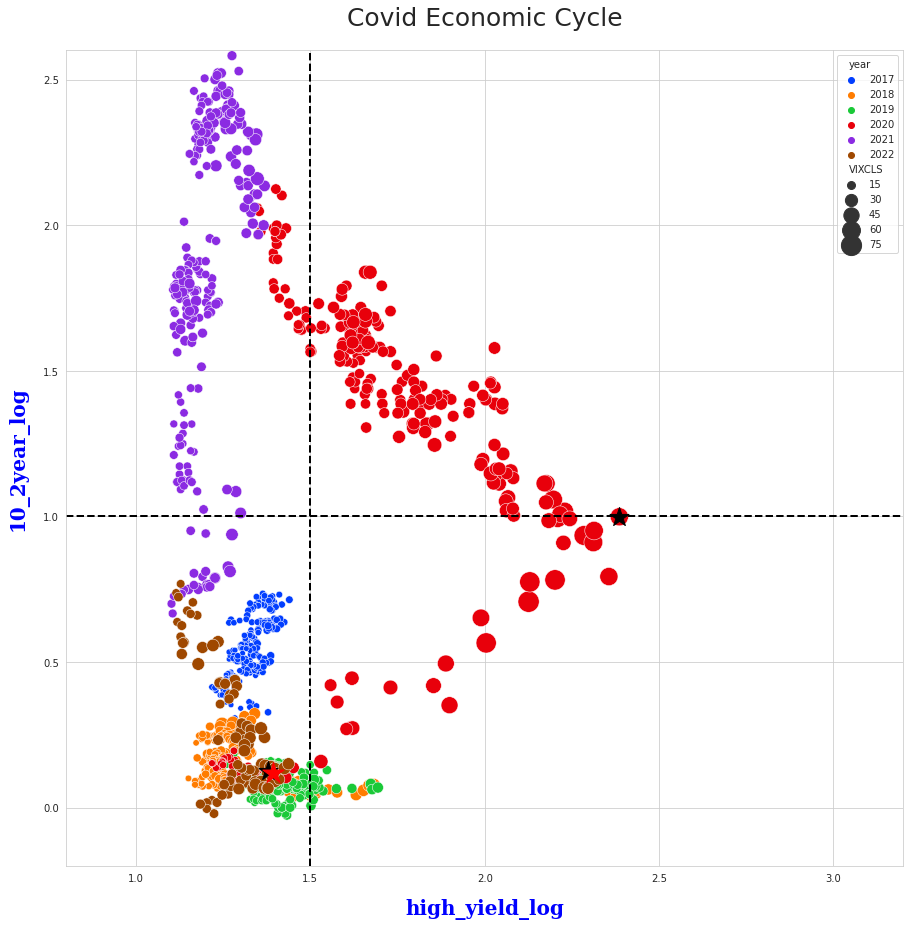

In [73]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=covid, x='high_yield_log', y='10_2year_log', hue='year', 
                size='VIXCLS', sizes=(30, 450), palette='bright')

# Date of COVI19 Crisis - START
x = data.iloc[covid_start]['high_yield_log']
y = data.iloc[covid_start]['10_2year_log']
plt.scatter(x, y, s=400, c='k', marker='*')

# Date of COVI19 Crisis - END
a = data.iloc[covid_end]['high_yield_log']
b = data.iloc[covid_end]['10_2year_log']
plt.scatter(a, b, s=400, c='k', marker='*')

# Now
now_x = data.iloc[-1]['high_yield_log']
now_y = data.iloc[-1]['10_2year_log']
plt.scatter(now_x, now_y, s=500, c='r', marker='*')

# Judge Economic Cycle
plt.axvline(1.5, 0, 1, color='black', linestyle='--', linewidth=2)
plt.axhline(1, 0, 1, color='black', linestyle='--', linewidth=2)

plt.xlim(0.8,3.2)
plt.ylim(-0.2,2.6)
plt.title("Covid Economic Cycle", fontsize=25, pad=25)
plt.xlabel('high_yield_log', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('10_2year_log', fontsize=20, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})

### 10s Economic Cycle - SubPrime Crisis

In [57]:
subprime = data[(data['year'] < 2017)&(data['year'] >= 2005)]
subprime.head()

,DATE,DGS10,DGS2,DGS3MO,T10Y2Y,VIXCLS,BAMLH0A0HYM2,10_2year_log,10_3month_log,high_yield_log,year,month,day
2115,2005-01-03,4.23,3.10,2.32,1.13,14.08,3.06,0.310800,0.600635,1.118415,2005,1,3
2116,2005-01-04,4.29,3.20,2.33,1.09,13.98,2.97,0.293136,0.610418,1.088562,2005,1,4
2117,2005-01-05,4.29,3.22,2.33,1.07,14.09,3.04,0.286905,0.610418,1.111858,2005,1,5
2118,2005-01-06,4.29,3.18,2.31,1.11,13.58,3.09,0.299406,0.619039,1.128171,2005,1,6
2119,2005-01-07,4.29,3.20,2.32,1.09,13.49,3.07,0.293136,0.614720,1.121678,2005,1,7


#### Visualization

In [58]:
subprime_start = int(subprime[subprime['DATE'] == '2007-11-01 00:00:00'].index.values)
subprime_end = int(subprime[subprime['DATE'] == '2009-03-06 00:00:00'].index.values)

Text(0, 0.5, '10_2year_log')

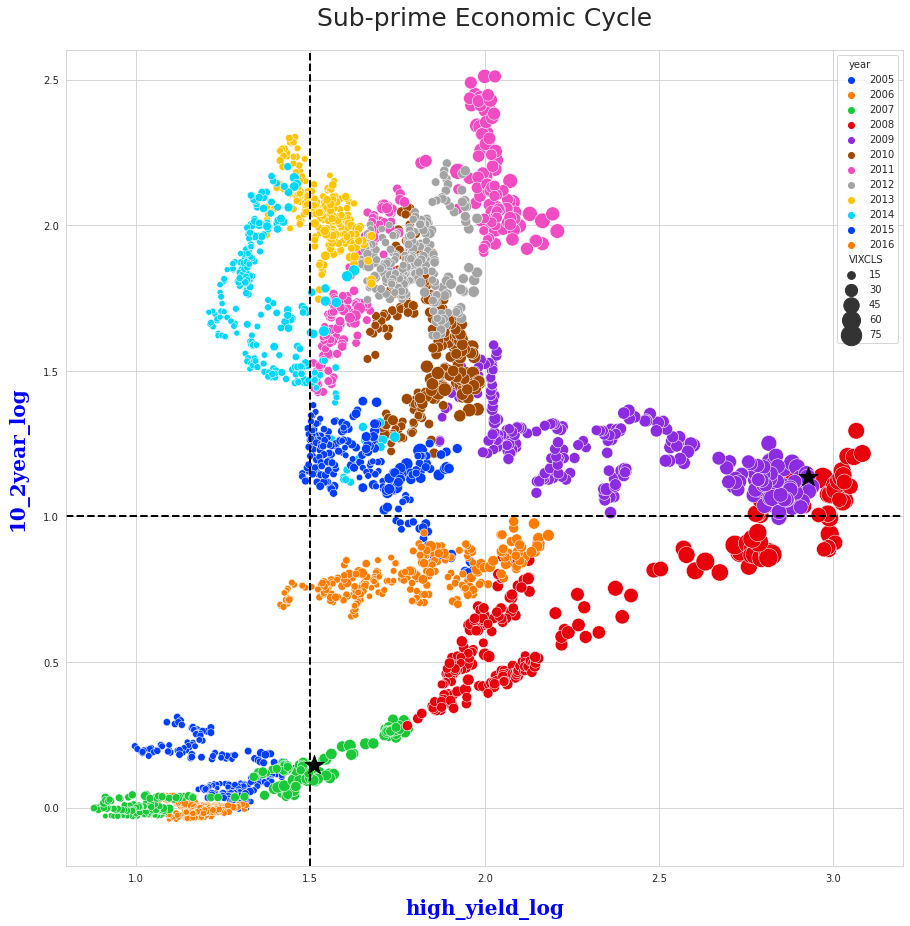

In [74]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=subprime, x='high_yield_log', y='10_2year_log', hue='year', 
                size='VIXCLS', sizes=(30, 450), palette='bright')

# Date of SubPrime Crisis - START

x = data.iloc[subprime_start]['high_yield_log']
y = data.iloc[subprime_start]['10_2year_log']
plt.scatter(x, y, s=400, c='k', marker='*')

# Date of SubPrime Crisis - END

a = data.iloc[subprime_end]['high_yield_log']
b = data.iloc[subprime_end]['10_2year_log']
plt.scatter(a, b, s=400, c='k', marker='*')

# Judge Economic Cycle
plt.axvline(1.5, 0, 1, color='black', linestyle='--', linewidth=2)
plt.axhline(1, 0, 1, color='black', linestyle='--', linewidth=2)

plt.xlim(0.8,3.2)
plt.ylim(-0.2,2.6)
plt.title("Sub-prime Economic Cycle", fontsize=25, pad=25)
plt.xlabel('high_yield_log', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('10_2year_log', fontsize=20, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})

### 00s Economic Cycle - Dotcom Bubble Crisis

In [63]:
dotcom = data[(data['year'] < 2005)]
dotcom.head()

,DATE,DGS10,DGS2,DGS3MO,T10Y2Y,VIXCLS,BAMLH0A0HYM2,10_2year_log,10_3month_log,high_yield_log,year,month,day
0,1997-01-02,6.54,5.97,5.19,0.57,21.14,3.06,0.091190,0.231203,1.118415,1997,1,2
1,1997-01-03,6.52,5.95,5.17,0.57,19.13,3.09,0.091483,0.232002,1.128171,1997,1,3
2,1997-01-06,6.54,5.97,5.17,0.57,19.89,3.10,0.091190,0.235064,1.131402,1997,1,6
3,1997-01-07,6.57,5.98,5.16,0.59,19.35,3.10,0.094093,0.241577,1.131402,1997,1,7
4,1997-01-08,6.60,6.01,5.16,0.59,20.24,3.07,0.093645,0.246133,1.121678,1997,1,8


#### Visualization

In [66]:
dotcom_start = int(dotcom[dotcom['DATE'] == '2000-03-01 00:00:00'].index.values)
dotcom_end = int(dotcom[dotcom['DATE'] == '2002-09-30 00:00:00'].index.values)

Text(0, 0.5, '10_2year_log')

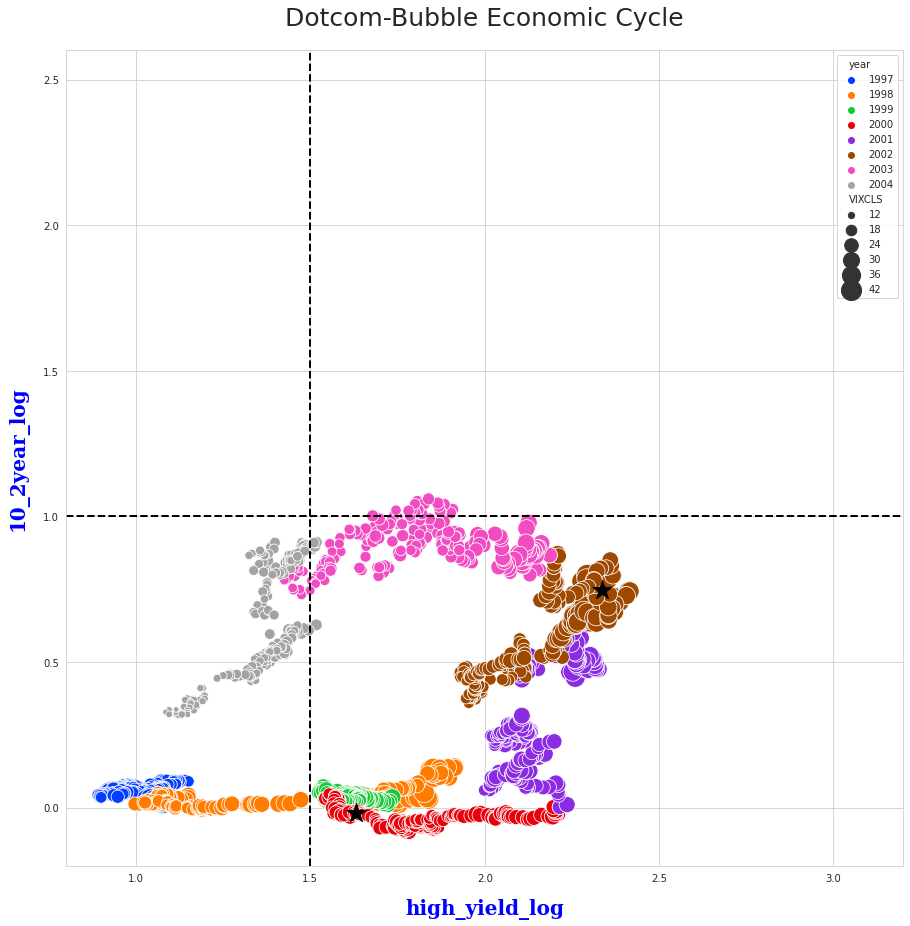

In [75]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=dotcom, x='high_yield_log', y='10_2year_log', hue='year', 
                size='VIXCLS', sizes=(30, 450), palette='bright')

# Date of Dotcom Bubble Crisis - START

x = data.iloc[dotcom_start]['high_yield_log']
y = data.iloc[dotcom_start]['10_2year_log']
plt.scatter(x, y, s=400, c='k', marker='*')

# Date of Dotcom Bubble Crisis - END

a = data.iloc[dotcom_end]['high_yield_log']
b = data.iloc[dotcom_end]['10_2year_log']
plt.scatter(a, b, s=400, c='k', marker='*')

# Judge Economic Cycle
plt.axvline(1.5, 0, 1, color='black', linestyle='--', linewidth=2)
plt.axhline(1, 0, 1, color='black', linestyle='--', linewidth=2)

plt.xlim(0.8,3.2)
plt.ylim(-0.2,2.6)
plt.title("Dotcom-Bubble Economic Cycle", fontsize=25, pad=25)
plt.xlabel('high_yield_log', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('10_2year_log', fontsize=20, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})

### NOW

In [76]:
now = data[(data['year'] > 2020)]
now.head()

,DATE,DGS10,DGS2,DGS3MO,T10Y2Y,VIXCLS,BAMLH0A0HYM2,10_2year_log,10_3month_log,high_yield_log,year,month,day
6342,2021-01-01,0.93,0.13,0.09,0.80,22.75,3.86,1.967650,2.335375,1.350667,2021,1,1
6343,2021-01-04,0.93,0.11,0.09,0.82,26.97,3.93,2.134704,2.335375,1.368639,2021,1,4
6344,2021-01-05,0.96,0.13,0.09,0.83,25.34,3.92,1.999399,2.367124,1.366092,2021,1,5
6345,2021-01-06,1.04,0.14,0.09,0.90,25.07,3.80,2.005334,2.447166,1.335001,2021,1,6
6346,2021-01-07,1.08,0.14,0.09,0.94,22.37,3.78,2.043074,2.484907,1.329724,2021,1,7


#### Visualization

Text(0, 0.5, '10_2year_log')

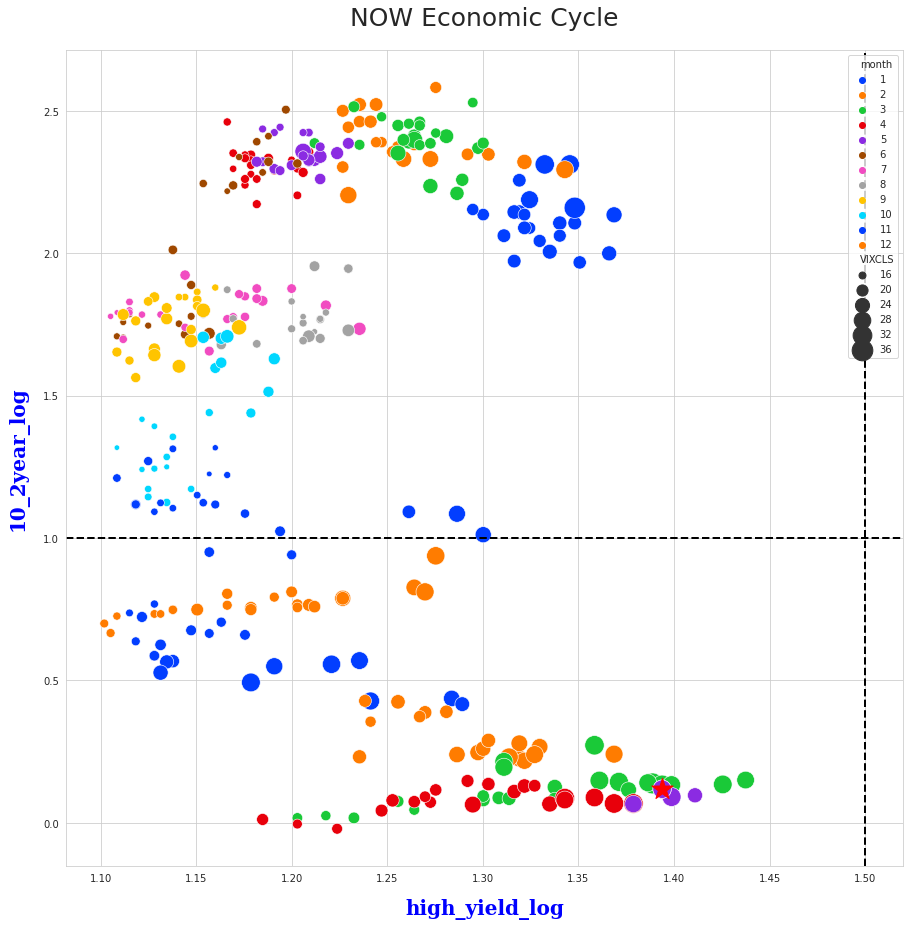

In [79]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=now, x='high_yield_log', y='10_2year_log', hue='month', 
                size='VIXCLS', sizes=(30, 450), palette='bright')

# Now
now_x = data.iloc[-1]['high_yield_log']
now_y = data.iloc[-1]['10_2year_log']
plt.scatter(now_x, now_y, s=500, c='r', marker='*')

# Judge Economic Cycle
plt.axvline(1.5, 0, 1, color='black', linestyle='--', linewidth=2)
plt.axhline(1, 0, 1, color='black', linestyle='--', linewidth=2)

# plt.xlim(0.8,3.2)
# plt.ylim(-0.2,2.6)
plt.title("NOW Economic Cycle", fontsize=25, pad=25)
plt.xlabel('high_yield_log', fontsize=20, labelpad=15 , fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})
plt.ylabel('10_2year_log', fontsize=20, labelpad=15, fontdict={'family': 'serif', 'color': 'b', 'weight': 'bold'})